<a href="https://colab.research.google.com/github/Many98/GLM_R2Py/blob/main/Python/01ZLMA_ex07_Binary_Data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 07 of the course 01ZLMA. 

# GLM for Discrete response - Binary Data Analysis

Alternative and Binomial responses

**Bernoulli (Alternative) Model**

$$Y_{i,j} \sim Be(\pi_i) \ i = 1,\ldots,K \ \text{and} \ j = 1,\ldots, n_i.$$
$K$ is number of groups, $n_i$ is number of observations in group $i$ and $\sum_{i=1}^{K} = N$
$$ E[Y_{i,j}] = \pi_i \ \text{and} \ g(\pi_i) = \eta_i =x_i^T \beta $$


**Binomial Model**
$$Y_i = \sum_{j=1}^{n_i} Y_{i,j} \sim Bi(n_i, \pi_i)$$

**Without continuos covariate (only factor variables)**

$K$ is constant and $n_i \rightarrow \infty $

**With at least one continuos covariate**

$n_i \approx 1$ ( $n_i$ is small enough) and $K \rightarrow \infty$



## Link functions for binary data

**Logistic function:**

The logistic function is the canonical link function for binary responses, and it is CDF of the standard logistic distribution.

$$\pi_i = \frac{1}{1+e^{-x_i^T \beta}} $$ 


**Probit function:**

The CDF of the normal distribution. 
$$\pi_i = \Phi({x_i^T \beta}) $$ 


**Cauchit function:**

The CDF of the Cauchy distribution

$$\pi_i = \frac{1}{\pi}\text{arctan}(x_i^T \beta) + \frac{1}{2} $$ 


**Complementary log-log (cloglog) function:**

The inverse of the conditional log-log function (CDF of the Gumbel distribution)

$$\pi_i = 1 − e^{-e^{x_i^T \beta}}$$

The counter part of the cloglog function is log-log link function.

In [44]:
import numpy as np
import scipy
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot

import pandas as pd

from dfply import *  # handy module to mimic R dplyr library

from helpers import Anova

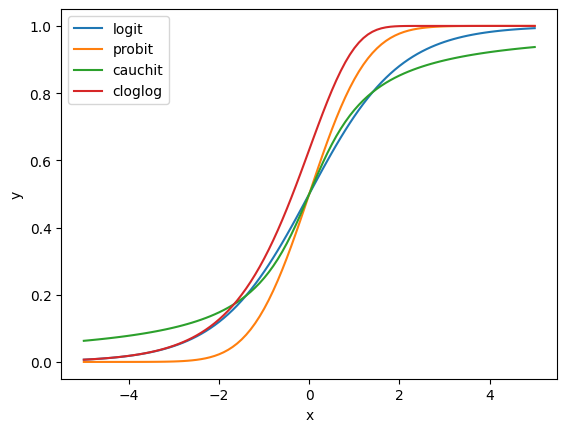

In [45]:
x = np.tile(np.linspace(-5, 5, 101), 4).reshape(4, -1)
y = []
names =[]

for i, j in enumerate(zip(("logit", "probit", "cauchit", "cloglog"), 
                (sm.genmod.families.links.Logit(), sm.genmod.families.links.probit(), 
                 sm.genmod.families.links.cauchy(), sm.genmod.families.links.CLogLog()))):
    
    y.append(j[1].inverse(x[i]))
    names.append([j[0]]*len(x[i]))
    
y = np.array(y).flatten()
n = np.array(names).flatten()

fig, ax = plt.subplots()



sns.lineplot(x='x', y='y', data=pd.DataFrame(data={'x': x.flatten(), 'y': y, 'n': n}), ax=ax, hue='n')
    

ax.legend()
plt.show()


## Logistic regression with Titanic dataset

https://www.kaggle.com/c/titanic/data

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [46]:
X, y = datasets.fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

titanic_train = pd.concat([X_train, y_train], axis=1)
titanic_test = pd.concat([X_test, y_test], axis=1)

In [47]:
titanic_train

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
953,3.0,"Leeni, Mr. Fahim ('Philip Zenni')",male,22.0,0.0,0.0,2620,7.2250,None,C,6,NaN,None,1
1020,3.0,"Minkoff, Mr. Lazar",male,21.0,0.0,0.0,349211,7.8958,None,S,None,NaN,None,0
198,1.0,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1.0,0.0,113773,53.1000,D30,S,10,NaN,"New York, NY",1
840,3.0,"Haas, Miss. Aloisia",female,24.0,0.0,0.0,349236,8.8500,None,S,None,NaN,None,0
1007,3.0,"McGowan, Miss. Anna 'Annie'",female,15.0,0.0,0.0,330923,8.0292,None,Q,None,NaN,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1.0,0.0,2659,14.4542,None,C,None,NaN,None,1
1143,3.0,"Rice, Master. Eric",male,7.0,4.0,1.0,382652,29.1250,None,Q,None,NaN,None,0
368,2.0,"Chapman, Mr. John Henry",male,37.0,1.0,0.0,SC/AH 29037,26.0000,None,S,None,17.0,"Cornwall / Spokane, WA",0
463,2.0,"Jefferys, Mr. Ernest Wilfred",male,22.0,2.0,0.0,C.A. 31029,31.5000,None,S,None,NaN,"Guernsey / Elizabeth, NJ",0


In [48]:
titanic_train.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,1047.000000,1047,1047,830.000000,1047.000000,1047.000000,1047,1046.000000,233,1045,387,96.000000,587,1047
unique,NaN,1046,2,NaN,NaN,NaN,792,NaN,161,3,27,NaN,329,2
top,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S,15,NaN,"New York, NY",0
freq,NaN,2,673,NaN,NaN,NaN,8,NaN,5,739,34,NaN,48,647
mean,2.295129,NaN,NaN,29.953414,0.489016,0.372493,NaN,32.876911,NaN,NaN,NaN,171.520833,NaN,NaN
std,0.838717,NaN,NaN,14.489557,1.013118,0.876029,NaN,52.308380,NaN,NaN,NaN,96.104656,NaN,NaN
min,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,94.250000,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,13.950000,NaN,NaN,NaN,171.500000,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,30.500000,NaN,NaN,NaN,259.500000,NaN,NaN


In [49]:
titanic_test.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,262.000000,262,262,216.000000,262.000000,262.000000,262,262.000000,62,262,99,25.000000,158,262
unique,NaN,262,2,NaN,NaN,NaN,235,NaN,54,3,21,NaN,114,2
top,NaN,"Kantor, Mr. Sinai",male,NaN,NaN,NaN,W./C. 6608,NaN,D10 D12,S,C,NaN,"New York, NY",0
freq,NaN,1,170,NaN,NaN,NaN,3,NaN,2,175,11,NaN,16,162
mean,2.293893,NaN,NaN,29.603395,0.538168,0.435115,NaN,34.966555,NaN,NaN,NaN,119.680000,NaN,NaN
std,0.835905,NaN,NaN,14.147135,1.149910,0.822101,NaN,49.564824,NaN,NaN,NaN,94.566432,NaN,NaN
min,1.000000,NaN,NaN,0.416700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,7.000000,NaN,NaN
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.925000,NaN,NaN,NaN,46.000000,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.620850,NaN,NaN,NaN,97.000000,NaN,NaN
75%,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,34.375000,NaN,NaN,NaN,181.000000,NaN,NaN


In [50]:
# Number of NA's
print(titanic_train.isna().sum())
titanic_test.isna().sum()

pclass         0
name           0
sex            0
age          217
sibsp          0
parch          0
ticket         0
fare           1
cabin        814
embarked       2
boat         660
body         951
home.dest    460
survived       0
dtype: int64


pclass         0
name           0
sex            0
age           46
sibsp          0
parch          0
ticket         0
fare           0
cabin        200
embarked       0
boat         163
body         237
home.dest    104
survived       0
dtype: int64

We will modify train dataset for our academic purpose :-)

### Model where all covariates are discrete

for categorical data in pandas see https://pandas.pydata.org/docs/user_guide/categorical.html

In [51]:
data_dis = titanic_train[['survived','pclass','sex','embarked']]

# or use dfply module
#data_dis = titanic_train >> select(titanic_train.survived, titanic_train.pclass, titanic_train.sex,
#                                   titanic_train.embarked)
print(data_dis.dtypes)

# dfply does not have mutate_if func  just mutate :(
data_dis_ = data_dis.apply(lambda x: x.astype('category') if str(data_dis['pclass'].dtype) == 'str' else x)
print(data_dis_.dtypes)

# only pandas
data_dis = data_dis[data_dis.embarked.isin(('C', 'S', 'Q'))]  # filter
data_dis = data_dis.rename(columns = {'pclass':'class_'})  # rename
data_dis = data_dis.astype('category')  # `categorize` 

# pandas pipe functionality
data_dis2=(
     data_dis
    .pipe(lambda df: df['embarked'].isin(('C', 'S', 'Q')))  # filter
    .rename({'pclass':'class_'})  # rename
    .astype('category') # `categorize` 
)

# with pandas + dfply
data_dis3 = data_dis >> \
            filter_by(data_dis.embarked.isin(('C', 'S', 'Q')) )  >> \
            transmute(survived = data_dis.survived.astype('category'),
                      class_ = data_dis.class_.astype('category'),
                      sex = data_dis.sex.astype('category'),
                      embarked = data_dis.embarked.astype('category'))  # `categorize`  & # rename
  
  

print(data_dis.describe(include='all'))
data_dis.dtypes

survived    category
pclass       float64
sex         category
embarked    category
dtype: object
survived    category
pclass       float64
sex         category
embarked    category
dtype: object
       survived  class_   sex embarked
count      1045  1045.0  1045     1045
unique        2     3.0     2        3
top           0     3.0  male        S
freq        647   568.0   673      739


survived    category
class_      category
sex         category
embarked    category
dtype: object

In [52]:
data_dis

,survived,class_,sex,embarked
953,1,3.0,male,C
1020,0,3.0,male,S
198,1,1.0,female,S
840,0,3.0,female,S
1007,1,3.0,female,Q
...,...,...,...,...
1300,1,3.0,female,C
1143,0,3.0,male,Q
368,0,2.0,male,S
463,0,2.0,male,S


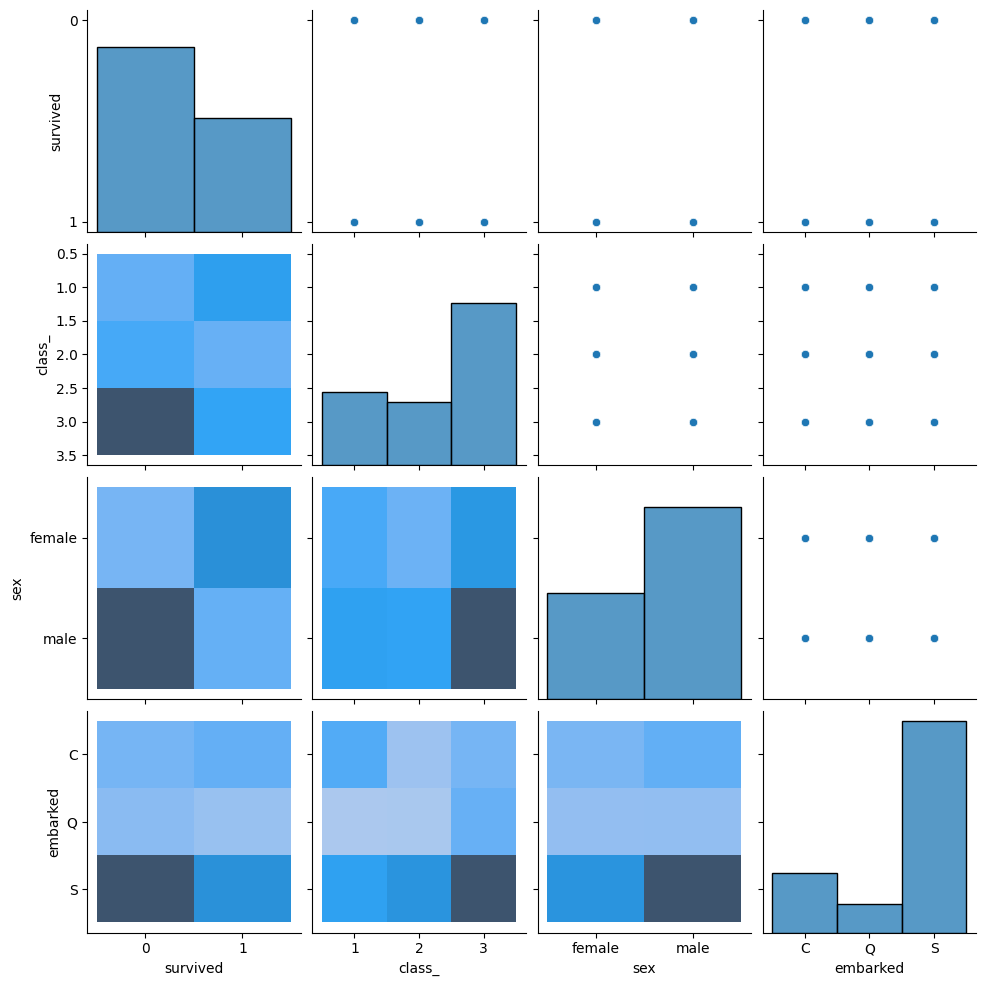

In [53]:
g = sns.pairplot(data=data_dis, vars=['survived', 'class_', 'sex','embarked'])
#g.map_diag(sns.kdeplot)
g.map_lower(sns.histplot)
#g.map_upper(sns.histplot)

In [54]:
pd.crosstab([data_dis.embarked, data_dis.sex, data_dis.survived], [data_dis.class_], margins=True)

class_                    1.0  2.0  3.0   All
embarked sex    survived                     
C        female 0           1    0    6     7
                1          56   11   14    81
         male   0          31   10   44    85
                1          21    3   10    34
Q        female 0           0    0   18    18
                1           1    2   28    31
         male   0           1    4   38    43
                1           0    0    7     7
S        female 0           3    9   62    74
                1          54   62   45   161
         male   0          62  102  256   420
                1          27   17   40    84
All                       257  220  568  1045

In [55]:
print(pd.crosstab([data_dis.survived], [data_dis.class_], margins=True))
print(pd.crosstab([data_dis.survived], [data_dis.class_], normalize='index'))
print(pd.crosstab([data_dis.survived], [data_dis.class_], normalize='columns'))

class_    1.0  2.0  3.0   All
survived                     
0          98  125  424   647
1         159   95  144   398
All       257  220  568  1045
class_         1.0       2.0       3.0
survived                              
0         0.151468  0.193199  0.655332
1         0.399497  0.238693  0.361809
class_         1.0       2.0       3.0
survived                              
0         0.381323  0.568182  0.746479
1         0.618677  0.431818  0.253521


In [56]:
# Count observations
print(pd.crosstab([data_dis.survived], [data_dis.sex], margins=True))
# Conditional proportions given rows
print(pd.crosstab([data_dis.survived], [data_dis.sex], normalize='index'))
# Conditional proportions given columns
print(pd.crosstab([data_dis.survived], [data_dis.sex], normalize='columns'))

sex       female  male   All
survived                    
0             99   548   647
1            273   125   398
All          372   673  1045
sex         female      male
survived                    
0         0.153014  0.846986
1         0.685930  0.314070
sex         female      male
survived                    
0         0.266129  0.814264
1         0.733871  0.185736


In [57]:
print(pd.crosstab([data_dis.survived], [data_dis.embarked], margins=True))
print(pd.crosstab([data_dis.survived], [data_dis.embarked], normalize='columns'))


embarked    C   Q    S   All
survived                    
0          92  61  494   647
1         115  38  245   398
All       207  99  739  1045
embarked         C         Q         S
survived                              
0         0.444444  0.616162  0.668471
1         0.555556  0.383838  0.331529


In [58]:
table_sex = pd.crosstab([data_dis.survived], [data_dis.sex], margins=True)
table_sex.iloc[0, 0]
table_sex

sex,female,male,All
survived,,,
0,99,548,647
1,273,125,398
All,372,673,1045


In [59]:
# Odss ratio (empirický poměr šancí)
def OR(df):
    return df.iloc[0, 0] / df.iloc[0, 1] / (df.iloc[1, 0] / df.iloc[1, 1])

table_sex = pd.crosstab([data_dis.survived], [data_dis.sex], margins=True)
print(table_sex)
print(f'Odds ratio: {OR(table_sex)}')
# Men have 

sex       female  male   All
survived                    
0             99   548   647
1            273   125   398
All          372   673  1045
Odds ratio: 0.08271837651399695


In [60]:
#install.packages("epitools")
#library(epitools)
#oddsratio.wald(table_sex, conf.level = 0.95)

#/TODO for python/

In [61]:

c, p, dof, expected = scipy.stats.chi2_contingency(table_sex)
print(f'Statistic: {c} \n'
      f'Deg of freedom: {dof} \n'
      f'p value: {p}')

Statistic: 305.25496099579686 
Deg of freedom: 4 
p value: 7.965193691682532e-65


### Null model

* Compute the null model (assume that the probability of survival was the same for all passangers)

* How do we interpret estimated parameter?

## Note
endog (dependent var)for Binomial family in statsmodels can be specified in one of three ways: A 1d array of 0 or 1 values, indicating failure or success respectively. A 2d array, with two columns. The first column represents the success count and the second column represents the failure count. A 1d array of proportions, indicating the proportion of successes, with parameter var_weights containing the number of trials for each row.

In [62]:
# dependet variable in our case `survived` must be casted to float/int as required in statsmodels documentation
# for Binomial family https://www.statsmodels.org/dev/generated/statsmodels.genmod.families.family.Binomial.html#statsmodels.genmod.families.family.Binomial


data_dis['survived'] = data_dis['survived'].astype('float')

mod0=smf.glm(formula = 'survived~1', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1044
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -694.39
Date:                Tue, 06 Sep 2022   Deviance:                       1388.8
Time:                        22:22:24   Pearson chi2:                 1.04e+03
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4859      0.064     -7.627      0.000      -0.611      -0.361
==============================================================================
"""

In [63]:
# The chances of survival according to training data.
print(np.exp(mod0.params[0]))

# The probability of survival.
print(np.exp(mod0.params[0])/(1+np.exp(mod0.params[0])))


0.615146831530141
0.3808612440191395


In [64]:
mod0.params[0]

-0.4858942892164597

### Model with variable: sex

* Compute the model with one covariate sex. 

* How can we interpret estiamted coefficients? 

* Did survival depend on gender (`sex`) ?

* Perform an appropriate tests.

* Did women have a better chance of survival? 


In [65]:
mod_sex=smf.glm(formula = 'survived~sex', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod_sex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1043
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -538.55
Date:                Tue, 06 Sep 2022   Deviance:                       1077.1
Time:                        22:22:24   Pearson chi2:                 1.04e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2579
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0144      0.117      8.646      0.000       0.784       1.244
sex[T.male]    -2.4923      0.154    -16.227      0.000      -2.793      -2.191
===============================================================================
"""

Use deviance to test submodels `anova(model_1,model_2,test="Chisq")`.

In [66]:
# The chances of survival according to training data.
print(np.exp(mod_sex.params))
#sexmale:    0.08419973147842043

anova = Anova()
anova(mod_sex,mod0,test="Chisq")



Intercept      2.757576
sex[T.male]    0.082718
dtype: float64


,resid_df,resid_deviance,df,deviance,chi2,p_val
0,1043,1077.104762,NaN,NaN,NaN,NaN
1,1044,1388.771922,-1.0,-311.66716,311.66716,9.463420e-70


In [67]:
np.array(mod_sex.params.index)

array(['Intercept', 'sex[T.male]'], dtype=object)

In [68]:
mod_sex.cov_params().to_numpy()

array([[ 0.01376399, -0.01376399],
       [-0.01376399,  0.02358881]])

In [69]:
#Function to estimate OR with lower and upper limit of 95% CI for OR

def OR_coef(variable,model,CI):
    param = np.array(model.params)
    where = np.where(np.array(model.params.index) == variable)
    beta = param[where]
    se = np.sqrt(np.diag(model.cov_params().to_numpy()))[where]
    or_ = np.exp(beta)
    
    return pd.DataFrame(index=[variable], data={'OR': or_, 'LCL': np.exp(beta-1*scipy.stats.norm.ppf(CI/2 +0.5)*se)
                                              , 'UCL':np.exp(beta+ scipy.stats.norm.ppf(CI/2 +0.5)*se)})
OR_coef("sex[T.male]",mod_sex,0.95)

,OR,LCL,UCL
sex[T.male],0.082718,0.061217,0.111773


Compare with results obtained from contingency table.

### Your turn:

Estimate model with one covariate `class` and compute: 

1. Did survival depend on (`class`) ?

2. Perform an appropriate tests.

3. Compute odds ratios between classes.

4. Did passangers in second class have a better chance of survival than in third? 


In [70]:
#1. 

In [71]:
#2. 

In [72]:
#3.

In [73]:
#4.

### Model with all discrete covariates without interactions

In [74]:
# Simple Logistic Regression model with all discrete covariates without interactions

# to work with factor in statsmodels we need to first one-hot encode variables
one_hot = pd.get_dummies(data_dis.iloc[:, data_dis.columns != 'survived'],
                         columns=list(np.array(data_dis.columns)[data_dis.columns != 'survived']),
                    drop_first=True)
one_hot = sm.add_constant(one_hot) # add intercept
mod1=sm.GLM(endog=data_dis.survived, exog=one_hot,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1039
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -488.65
Date:                Tue, 06 Sep 2022   Deviance:                       977.30
Time:                        22:22:24   Pearson chi2:                 1.08e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3255
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5494      0.241     10.581      0.000       2.077       3.022
class__2.0    -0.6893      0.232     -2.973      0.003      -1.144      -0.235
class__3.0    -1.6316      0.205     -7.942      0.000      -2.034      -1.229
sex_male      -2.5866      0.169    -15.333      0.000      -2.917      -2.256
embarked_Q    -0.3858      0.323     -1.195      0.232      -1.019       0.247
embarked_S    -0.6518      0.208     -3.129      0.002      -1.060      -0.243
==============================================================================
"""

Deviance tests to add/drop independent variables.

/NOT IMPLEMENTED YET FOR PYTHON/ 

`drop1(model,test="Chisq")`

`add1(model,terms.to.add,test="Chisq")`

In [75]:
drop1(mod1,test="Chisq")


NameError: name 'drop1' is not defined

In [ ]:
add1(mod0,survived~sex+class+embarked, test="Chisq")


In [ ]:
data_dis2 = data_dis.replace({'embarked': 'Q'}, 'C')

one_hot2 = pd.get_dummies(data_dis2.iloc[:, data_dis2.columns != 'survived'],
                         columns=list(np.array(data_dis2.columns)[data_dis2.columns != 'survived']),
                    drop_first=True)
one_hot2 = sm.add_constant(one_hot2) # add intercept

mod1=sm.GLM(endog=data_dis2.survived, exog=one_hot2,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod1.summary()

In [ ]:
#mod1=glm(survived~relevel(factor(sex),ref="male")+class+embarked,family=binomial(link = "logit"),data_dis2) 
#summary(mod1)



In [ ]:
OR_coef("sex_male",mod1,0.95)

Interpret previous result:

* By how many percentage is the chance of survival lower for  men? 

* Interpret confidence intrval and its significance.


Lets try model with second order interactions.


In [ ]:
add1(mod1,~.^2,test="Chisq")

In [ ]:

mod2_all=smf.glm(formula = 'survived~sex*embarked + sex*class_+class_*embarked', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod2_all.summary()



In [ ]:
step(mod2_all)

In [ ]:
mod2=smf.glm(formula = 'survived~sex*embarked + sex*class_', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod2.summary()



In [ ]:
anova(mod2_all,mod2,test="Chisq")


Interpretation by OR in models with interactions is more complitacated, see Lecture notes.

Lets try model with merged factor levels.




In [ ]:
data_dis3 = data_dis2.replace({'class_': 2}, 1)

data_dis3.class_.unique()

In [ ]:
mod2=smf.glm(formula = 'survived~sex*embarked + sex*class_', data=data_dis3,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod2.summary()


In [ ]:
mod3=smf.glm(formula = 'survived~sex*embarked + sex*class_+class_*embarked', data=data_dis3,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod3.summary())



anova(mod2,mod3,test="Chisq")


## Model with continuous independent variable.


Discuss difference from models without continuous variable (again)!!!

In [ ]:
titanic_train.info()

In [76]:
       
data_con = titanic_train >> \
                select(titanic_train.survived, titanic_train.sex, titanic_train.embarked, titanic_train.fare,
                      titanic_train.pclass, titanic_train.age)

data_con = data_con.apply(lambda x: x.astype('category') if str(x.dtype) in ('object', 'str') else x) 

print(data_con.describe(include='all'))
print(data_con.info())

    
data_con = data_con >> \
            filter_by(data_con.embarked.isin(('C', 'S', 'Q')) )  >> \
            transmute(survived = data_con.survived.astype('float'), # cast to float beacause of statsmodels requirements
                      age = data_con.age,
                      fare = data_con.fare,
                      class_ = data_con.pclass.astype('category'),
                      sex = data_con.sex.astype('category'),
                      embarked = data_con.embarked.astype('category'))

data_con = data_con.dropna(axis=0, how='any')

print(data_con.describe(include='all'))          
data_con.info()

       survived   sex embarked         fare       pclass         age
count      1047  1047     1045  1046.000000  1047.000000  830.000000
unique        2     2        3          NaN          NaN         NaN
top           0  male        S          NaN          NaN         NaN
freq        647   673      739          NaN          NaN         NaN
mean        NaN   NaN      NaN    32.876911     2.295129   29.953414
std         NaN   NaN      NaN    52.308380     0.838717   14.489557
min         NaN   NaN      NaN     0.000000     1.000000    0.166700
25%         NaN   NaN      NaN     7.895800     2.000000   21.000000
50%         NaN   NaN      NaN    13.950000     3.000000   28.000000
75%         NaN   NaN      NaN    30.500000     3.000000   39.000000
max         NaN   NaN      NaN   512.329200     3.000000   80.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 953 to 1106
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    ---------

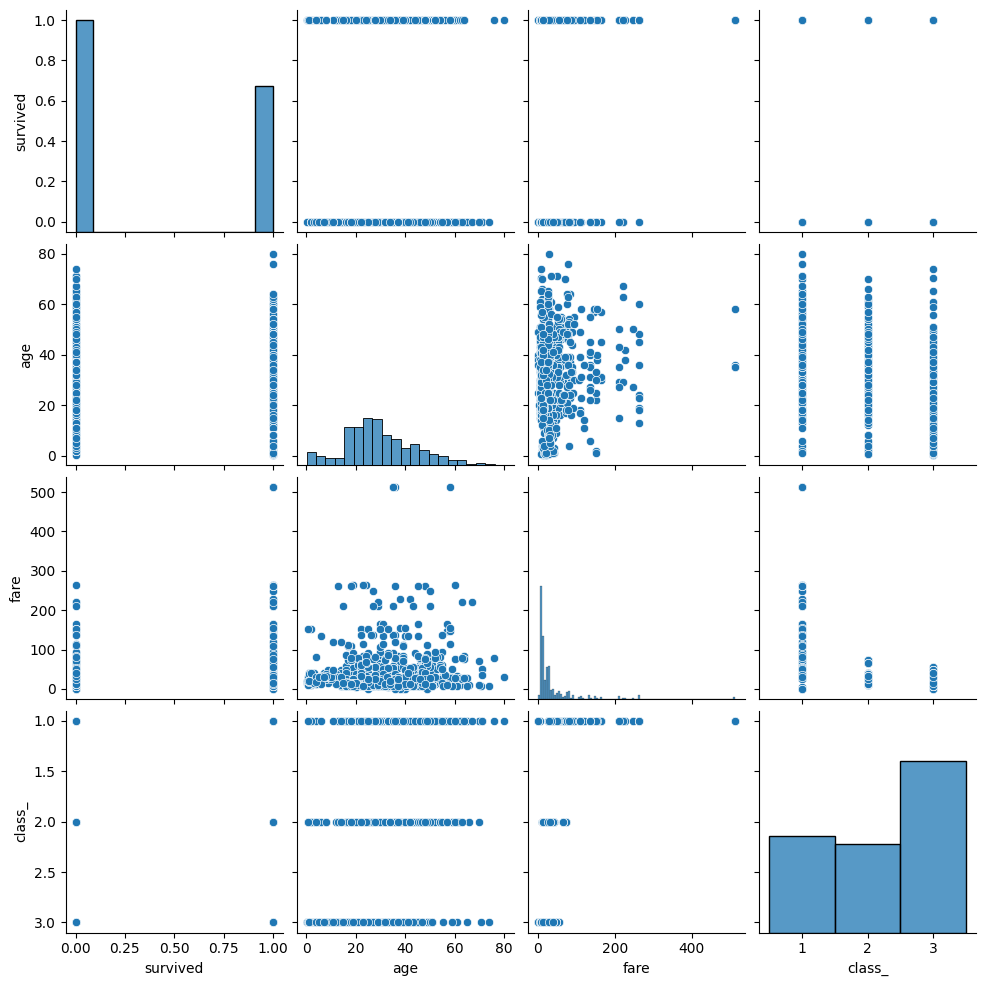

In [77]:
g = sns.pairplot(data=data_con, vars=['survived', 'age','fare','class_'])
#g.map_diag(sns.histplot)
#g.map_lower(sns.histplot)
#g.map_upper(sns.boxplot)

# TODO It needs define own functionality based on PairGrid which will distinguish categorical vs categorical
# categorical vs quantitative and quantitaive vs quantitative variables

Text(0.5, 1.0, 'Gender boxplot')

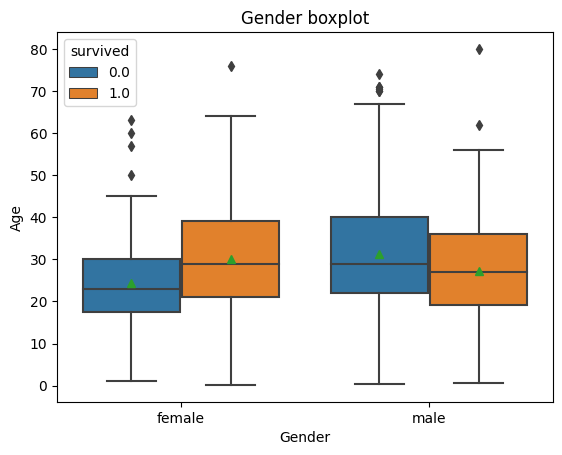

In [78]:
fig, ax = plt.subplots()
sns.boxplot(x='sex', y='age', hue='survived', ax = ax, data=data_con, showmeans=True)
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_title('Gender boxplot')

/media/emanuel/data/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/media/emanuel/data/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Class x Fare')

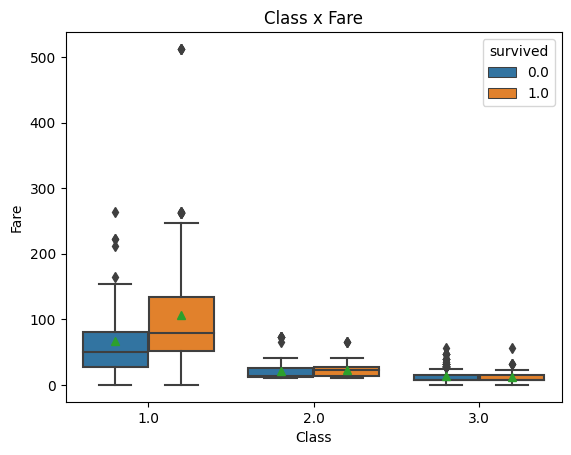

In [79]:
fig, ax = plt.subplots()
sns.boxplot(x='class_', y='fare', hue='survived', ax = ax, data=data_con, showmeans=True)
ax.set_xlabel('Class')
ax.set_ylabel('Fare')
ax.set_title('Class x Fare')

Continuous variable as factor

In [80]:
data_con_fac = data_con >> \
  mutate(age = pd.cut(data_con.age,(-np.inf, 15, 50, np.inf), labels=["child","adult","senior"]))
data_con_fac

,survived,age,fare,class_,sex,embarked
953,1.0,adult,7.2250,3.0,male,C
1020,0.0,adult,7.8958,3.0,male,S
198,1.0,adult,53.1000,1.0,female,S
840,0.0,adult,8.8500,3.0,female,S
1007,1.0,child,8.0292,3.0,female,Q
...,...,...,...,...,...,...
1300,1.0,child,14.4542,3.0,female,C
1143,0.0,child,29.1250,3.0,male,Q
368,0.0,adult,26.0000,2.0,male,S
463,0.0,adult,31.5000,2.0,male,S


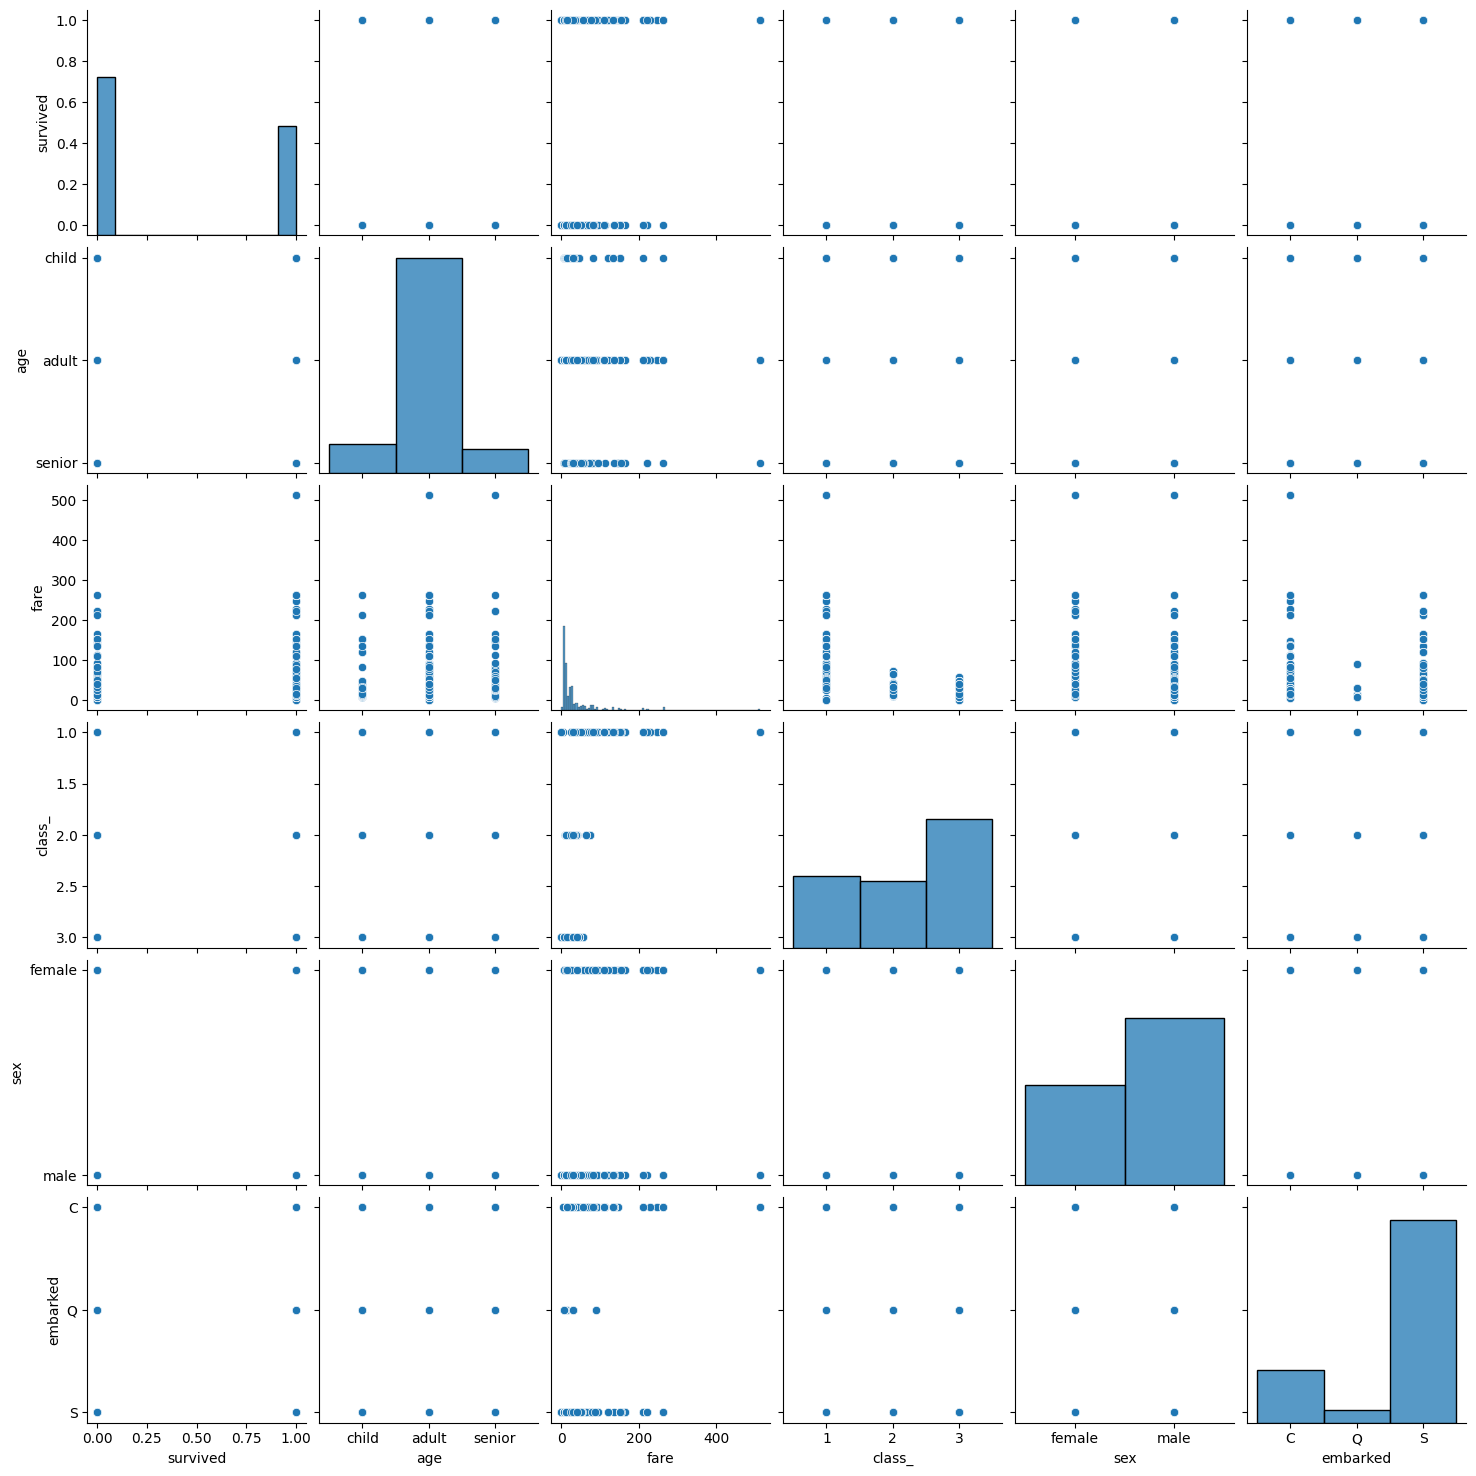

In [81]:
g = sns.pairplot(data=data_con_fac, vars=list(data_con_fac.columns))  # TODO needs custom implementation


In [82]:

mod_0= smf.glm(formula = 'survived~1', data=data_con_fac,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_0.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  827
Model:                            GLM   Df Residuals:                      826
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -559.00
Date:                Tue, 06 Sep 2022   Deviance:                       1118.0
Time:                        22:22:41   Pearson chi2:                     827.
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3743      0.071     -5.289      0.0

In [83]:

mod_age_fac = smf.glm(formula = 'survived~age', data=data_con_fac,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_age_fac.summary())

np.exp(mod_age_fac.params)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  827
Model:                            GLM   Df Residuals:                      824
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -556.02
Date:                Tue, 06 Sep 2022   Deviance:                       1112.0
Time:                        22:22:41   Pearson chi2:                     827.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007174
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1125      0.212      0.530

Intercept        1.119048
age[T.adult]     0.575100
age[T.senior]    0.609284
dtype: float64

Is the chance decreasing with increasing age?

In [84]:
anova(mod_age_fac,mod_0,test="Chisq")



,resid_df,resid_deviance,df,deviance,chi2,p_val
0,824,1112.041279,NaN,NaN,NaN,NaN
1,826,1117.995787,-2.0,-5.954508,5.954508,0.050933


In [85]:

mod_age = smf.glm(formula = 'survived~np.divide(age, 10)', data=data_con,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
print(mod_age.summary())
np.exp(mod_age.params)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  827
Model:                            GLM   Df Residuals:                      825
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -558.45
Date:                Tue, 06 Sep 2022   Deviance:                       1116.9
Time:                        22:22:41   Pearson chi2:                     827.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001318
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2213      0

Intercept             0.801441
np.divide(age, 10)    0.949906
dtype: float64

Question:

* With increasing age by 10 years, chance to survive decreased by 11%. 

* What do you think about causality in this result?

In [88]:
anova(mod_age,mod_0,test="Chisq")


,resid_df,resid_deviance,df,deviance,chi2,p_val
0,825,1116.905462,NaN,NaN,NaN,NaN
1,826,1117.995787,-1.0,-1.090325,1.090325,0.296399


Question:

* Can we compare by deviance test models `mod_age` and `mod_age_fac`?
* Which model do you prefere and why?
* For which approach (factorized or continuous) saturated model is useful and why?


In [87]:

#mod_sat_fac = smf.glm(formula = 'survived~sex*age*embarked*class_', data=data_con >> \
#                          mutate(age=data_con.age.astype('category'),
#                                 fare=data_con.fare.astype('category')),
#                family=sm.families.Binomial(sm.families.links.Logit())).fit()
#mod_sat_fac.summary()

Your turn:

Consider a model with continuos variables `age`, `fare`, and any factor variable. 

* Create factor `child`, which takes values 1 (child) and 0 (adult).
* Create factor from varaible `fare`, where each level break is by 10 pounds.
* Estimate a model, where the chance of survival depends on factorized `fare` and `sex` and `child`.
* What percentage is the chance of survival lower for adult compare to child? 
* Depends the probability of survival on fare? Test it.
* Assume that the chance of survival increases with exponential increasig fare. How the chance of survival increased if the person spent an extra 10 pound for a ticket? 
* Build a model where the probabilty of survival depends on both `age` and `fare`. Are both covariates significant?
* 

Next Exercises (8 and 9):

* Logistic regression and binary classification (ROC, accuracy, ...)
* Residual analysis
* Prediction and confidence intervals
* Logistic regression and ML approach

